# Data Exploration

In [1]:
# include libs
import math

import matplotlib.pyplot as plt
import pandas as pd


## Load data from csv File and output key insides

In [2]:
# Load and inspect data
df = pd.read_csv("../data/raw/angle_estimation_dataset.csv")

print(f"Dataset shape: {df.shape}")
print("\n First 5 rows:")
display(df.head())

print("\n Column dtypes:")
print(df.dtypes)

print("\n Basic statistics:")
display(df.describe())

Dataset shape: (20000, 26)

 First 5 rows:


,time,i_d,i_q,i_alpha,i_beta,v_d,v_q,v_alpha,v_beta,sin_theta_e,...,torque_e,torque_load,i_alpha_meas_12,i_beta_meas_12,i_alpha_meas_8,i_beta_meas_8,sin_theta_e_12bit,cos_theta_e_12bit,sin_theta_e_8bit,cos_theta_e_8bit
0,0.00000,0.0,0.029116,0.000000e+00,0.000000,0.000000e+00,0.163052,0.000000e+00,0.000000,0.000000,...,0.001402,0.0,-0.021978,0.007326,0.039216,0.039216,0.0,1.000155,0.0,1.006291
1,0.00005,0.0,0.055490,0.000000e+00,0.029116,0.000000e+00,0.156862,0.000000e+00,0.163052,0.000000,...,0.002672,0.0,-0.012210,0.017094,-0.039216,0.039216,0.0,1.000155,0.0,1.006291
2,0.00010,0.0,0.079399,0.000000e+00,0.055490,-4.356451e-07,0.151674,0.000000e+00,0.156862,0.000000,...,0.003823,0.0,-0.051282,0.075702,0.039216,0.039216,0.0,1.000155,0.0,1.006291
3,0.00015,0.0,0.101096,-1.113140e-07,0.079399,-1.811348e-06,0.147384,-6.482843e-07,0.151674,0.000001,...,0.004868,0.0,-0.007326,0.065934,-0.039216,0.039216,0.0,1.000155,0.0,1.006291
4,0.00020,0.0,0.120804,-5.535740e-07,0.101096,-4.470703e-06,0.143900,-2.618382e-06,0.147384,0.000005,...,0.005817,0.0,-0.012210,0.114774,0.039216,0.117647,0.0,1.000155,0.0,1.006291



 Column dtypes:
time                 float64
i_d                  float64
i_q                  float64
i_alpha              float64
i_beta               float64
v_d                  float64
v_q                  float64
v_alpha              float64
v_beta               float64
sin_theta_e          float64
cos_theta_e          float64
omega_e              float64
theta_e              float64
i_q_ref              float64
i_d_ref              float64
omega_ref            float64
torque_e             float64
torque_load          float64
i_alpha_meas_12      float64
i_beta_meas_12       float64
i_alpha_meas_8       float64
i_beta_meas_8        float64
sin_theta_e_12bit    float64
cos_theta_e_12bit    float64
sin_theta_e_8bit     float64
cos_theta_e_8bit     float64
dtype: object

 Basic statistics:


,time,i_d,i_q,i_alpha,i_beta,v_d,v_q,v_alpha,v_beta,sin_theta_e,...,torque_e,torque_load,i_alpha_meas_12,i_beta_meas_12,i_alpha_meas_8,i_beta_meas_8,sin_theta_e_12bit,cos_theta_e_12bit,sin_theta_e_8bit,cos_theta_e_8bit
count,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.499975,0.0,1.988619,-0.018661,-0.001423,-0.518543,9.142710,-0.021635,-0.009998,0.009397,...,0.095752,0.092786,-0.018487,-0.001349,-0.018733,-0.001471,0.009398,0.008301,0.009376,0.008336
std,0.288682,0.0,1.126693,1.610426,1.621601,0.423633,4.117292,7.102393,7.109109,0.704623,...,0.054250,0.054884,1.610698,1.621718,1.610541,1.621776,0.704634,0.709516,0.705038,0.710103
min,0.000000,0.0,-0.231288,-4.431695,-4.700069,-1.549668,0.143900,-13.998993,-14.144808,-1.000000,...,-0.011137,0.000000,-4.466422,-4.715507,-4.431373,-4.745098,-1.000155,-1.000155,-1.006291,-1.006291
25%,0.249988,0.0,0.957642,-0.995056,-1.003336,-0.932378,5.416892,-4.947186,-4.954623,-0.695132,...,0.046110,0.054263,-0.993895,-1.008547,-0.980392,-0.980392,-0.694893,-0.701029,-0.687223,-0.711767
50%,0.499975,0.0,1.757537,-0.000023,0.000008,-0.392639,6.134279,-0.111965,0.104003,0.024170,...,0.084625,0.084621,-0.007326,0.002442,-0.039216,0.039216,0.024544,0.013806,0.024544,0.024544
75%,0.749962,0.0,2.979913,0.976023,0.989059,-0.127964,13.530799,4.934272,4.941647,0.710873,...,0.143483,0.140444,0.974359,0.989011,0.980392,0.980392,0.710233,0.720971,0.711767,0.711767
max,0.999950,0.0,4.712301,4.087522,4.091427,0.031223,14.327675,13.997831,14.268594,1.000000,...,0.226897,0.196153,4.109890,4.119658,4.117647,4.117647,1.000155,1.000155,1.006291,1.006291


In [3]:
# Check for missing values.
print("Missing Values Check:")
print("="*40)
missing = df.isnull().sum()

display(missing)

Missing Values Check:


time                 0
i_d                  0
i_q                  0
i_alpha              0
i_beta               0
v_d                  0
v_q                  0
v_alpha              0
v_beta               0
sin_theta_e          0
cos_theta_e          0
omega_e              0
theta_e              0
i_q_ref              0
i_d_ref              0
omega_ref            0
torque_e             0
torque_load          0
i_alpha_meas_12      0
i_beta_meas_12       0
i_alpha_meas_8       0
i_beta_meas_8        0
sin_theta_e_12bit    0
cos_theta_e_12bit    0
sin_theta_e_8bit     0
cos_theta_e_8bit     0
dtype: int64

In [4]:
# Check for duplicates and delete if any.
print(f"\nDuplicates: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print(f"Found {df.duplicated().sum()} duplicate rows")
    df = df.drop_duplicates()
    print("Duplicates removed")


Duplicates: 0


Time-based Analysis (Check for Stationarity):


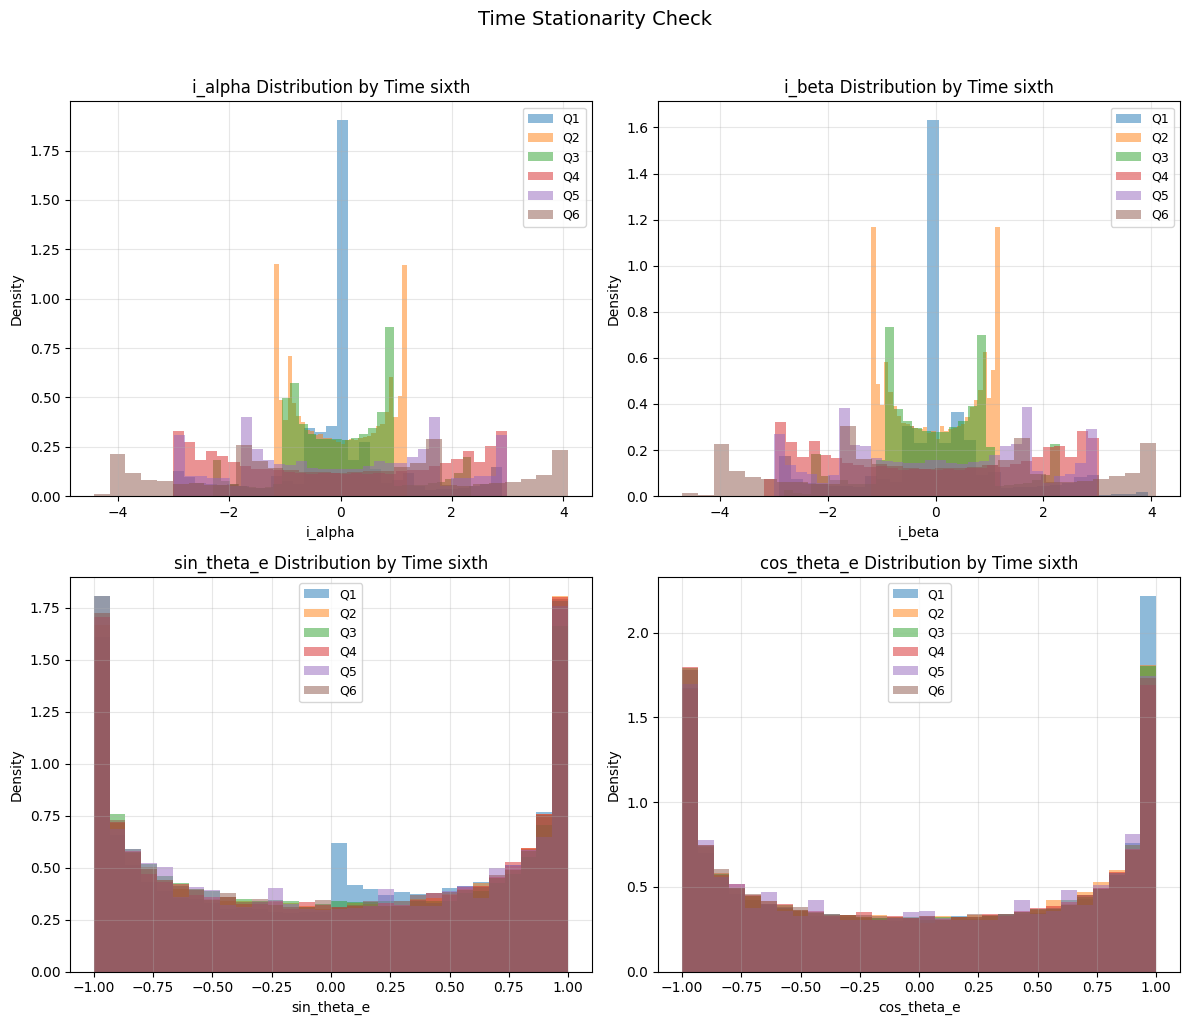


 If distributions look similar across sixth → Data is stationary
 If distributions change → Non-stationary (time-dependent patterns)


In [5]:
# Check if statistics change over time
print("Time-based Analysis (Check for Stationarity):")

# Split data into quarters
n_quarters = 6
quarter_size = len(df) // n_quarters

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()

key_vars = ['i_alpha', 'i_beta', 'sin_theta_e', 'cos_theta_e']

for i, var in enumerate(key_vars):
    for q in range(n_quarters):
        start = q * quarter_size
        end = (q + 1) * quarter_size if q < n_quarters - 1 else len(df)
        ax[i].hist(df[var].iloc[start:end], bins=30, alpha=0.5,
                  label=f'Q{q+1}', density=True)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Density')
    ax[i].set_title(f'{var} Distribution by Time sixth')
    ax[i].legend(fontsize=9)
    ax[i].grid(True, alpha=0.3)

plt.suptitle('Time Stationarity Check', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n If distributions look similar across sixth → Data is stationary")
print(" If distributions change → Non-stationary (time-dependent patterns)")

## Ouput Typical FOC data (Timeseries Data)
Here are the most common foc outputs. Here we can see how good the control algorthm is working. When reference and measured values are nearly the same, the control algorithm is working good.

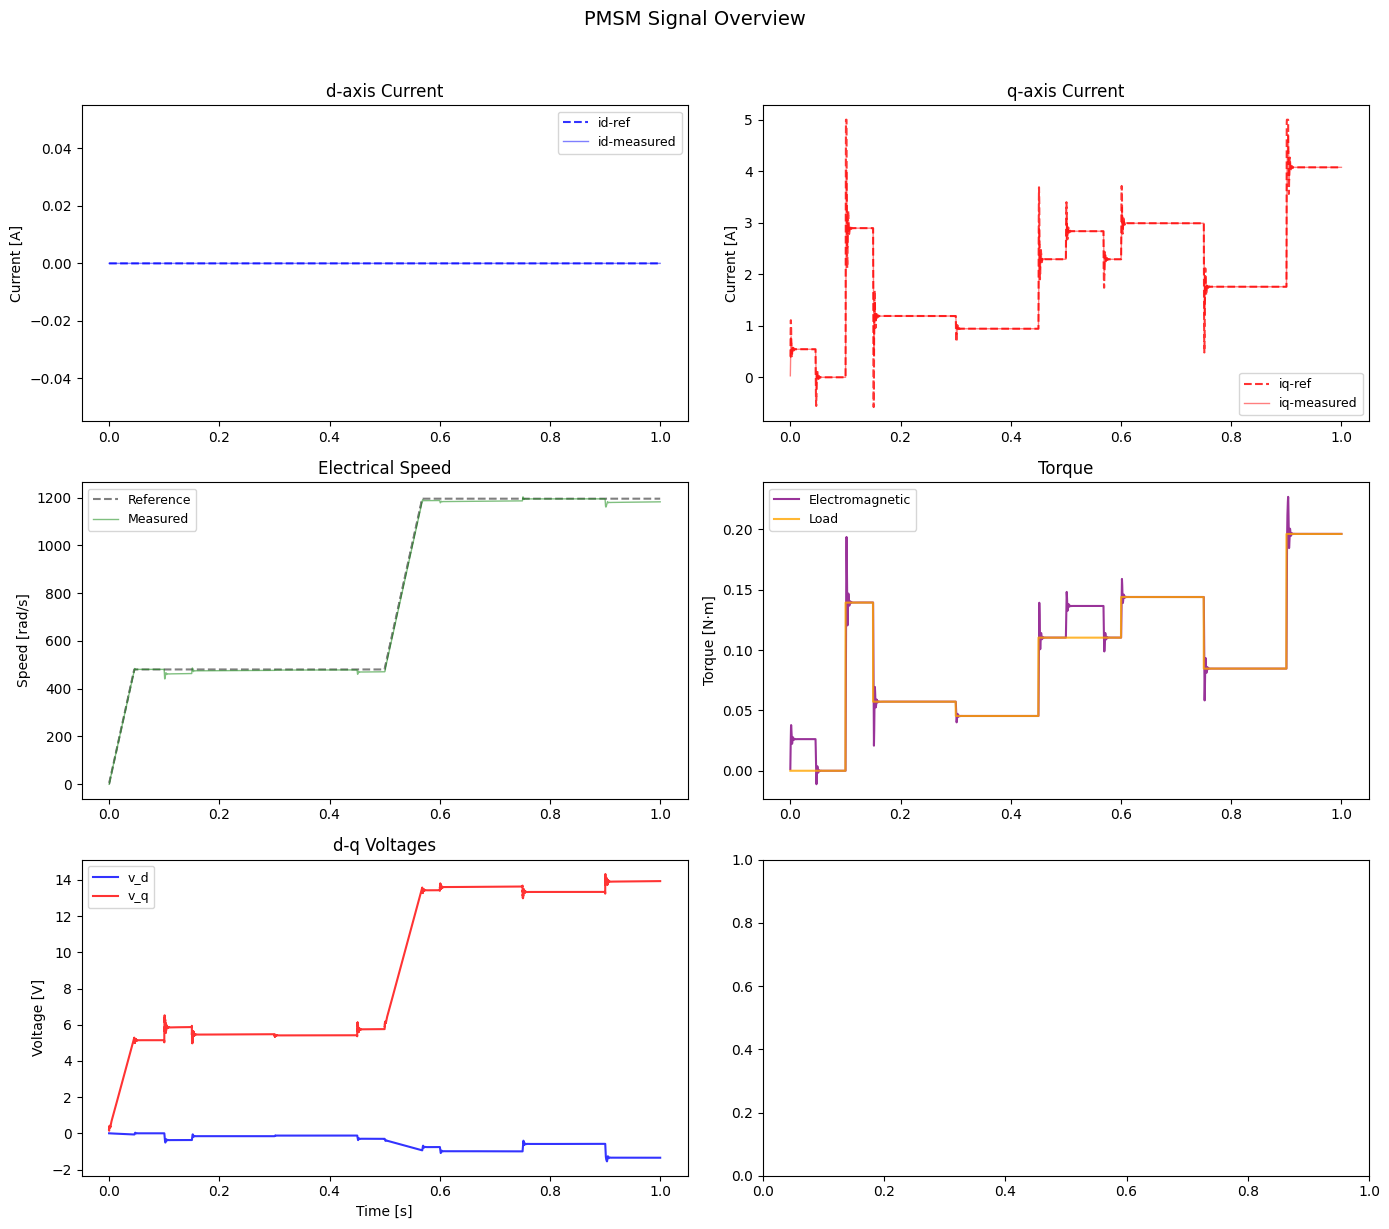

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Plot 1: d-axis Current^
ax[0, 0].plot(df['time'], df['i_d_ref'], 'b--', alpha=0.8, label='id-ref')
ax[0, 0].plot(df['time'], df['i_d'], 'b-', alpha=0.5, label='id-measured', linewidth=1)
ax[0, 0].set_ylabel('Current [A]')
ax[0, 0].set_title('d-axis Current')
ax[0, 0].legend(fontsize=9)

# Plot 2: q-axis Current
ax[0, 1].plot(df['time'], df['i_q_ref'], 'r--', alpha=0.8, label='iq-ref')
ax[0, 1].plot(df['time'], df['i_q'], 'r-', alpha=0.5, label='iq-measured', linewidth=1)
ax[0, 1].set_ylabel('Current [A]')
ax[0, 1].set_title('q-axis Current')
ax[0, 1].legend(fontsize=9)

# Plot 3: Speed
ax[1, 0].plot(df['time'], df['omega_ref'], 'k--', alpha=0.5, label='Reference')
ax[1, 0].plot(df['time'], df['omega_e'], 'g-', alpha=0.5, label='Measured', linewidth=1)
ax[1, 0].set_ylabel('Speed [rad/s]')
ax[1, 0].set_title('Electrical Speed')
ax[1, 0].legend(fontsize=9)

# Plot 4: Torque
ax[1, 1].plot(df['time'], df['torque_e'], 'purple', alpha=0.8, label='Electromagnetic')
ax[1, 1].plot(df['time'], df['torque_load'], 'orange', alpha=0.8, label='Load')
ax[1, 1].set_ylabel('Torque [N·m]')
ax[1, 1].set_title('Torque')
ax[1, 1].legend(fontsize=9)

# Plot 5: Voltages
ax[2, 0].plot(df['time'], df['v_d'], 'b-', alpha=0.8, label='v_d')
ax[2, 0].plot(df['time'], df['v_q'], 'r-', alpha=0.8, label='v_q')
ax[2, 0].set_xlabel('Time [s]')
ax[2, 0].set_ylabel('Voltage [V]')
ax[2, 0].set_title('d-q Voltages')
ax[2, 0].legend(fontsize=9)


plt.suptitle('PMSM Signal Overview', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Distribution Data
In the following plots there are plots of the key foc data points. With that plots it can be seen in which operating points the motor is most of the time.

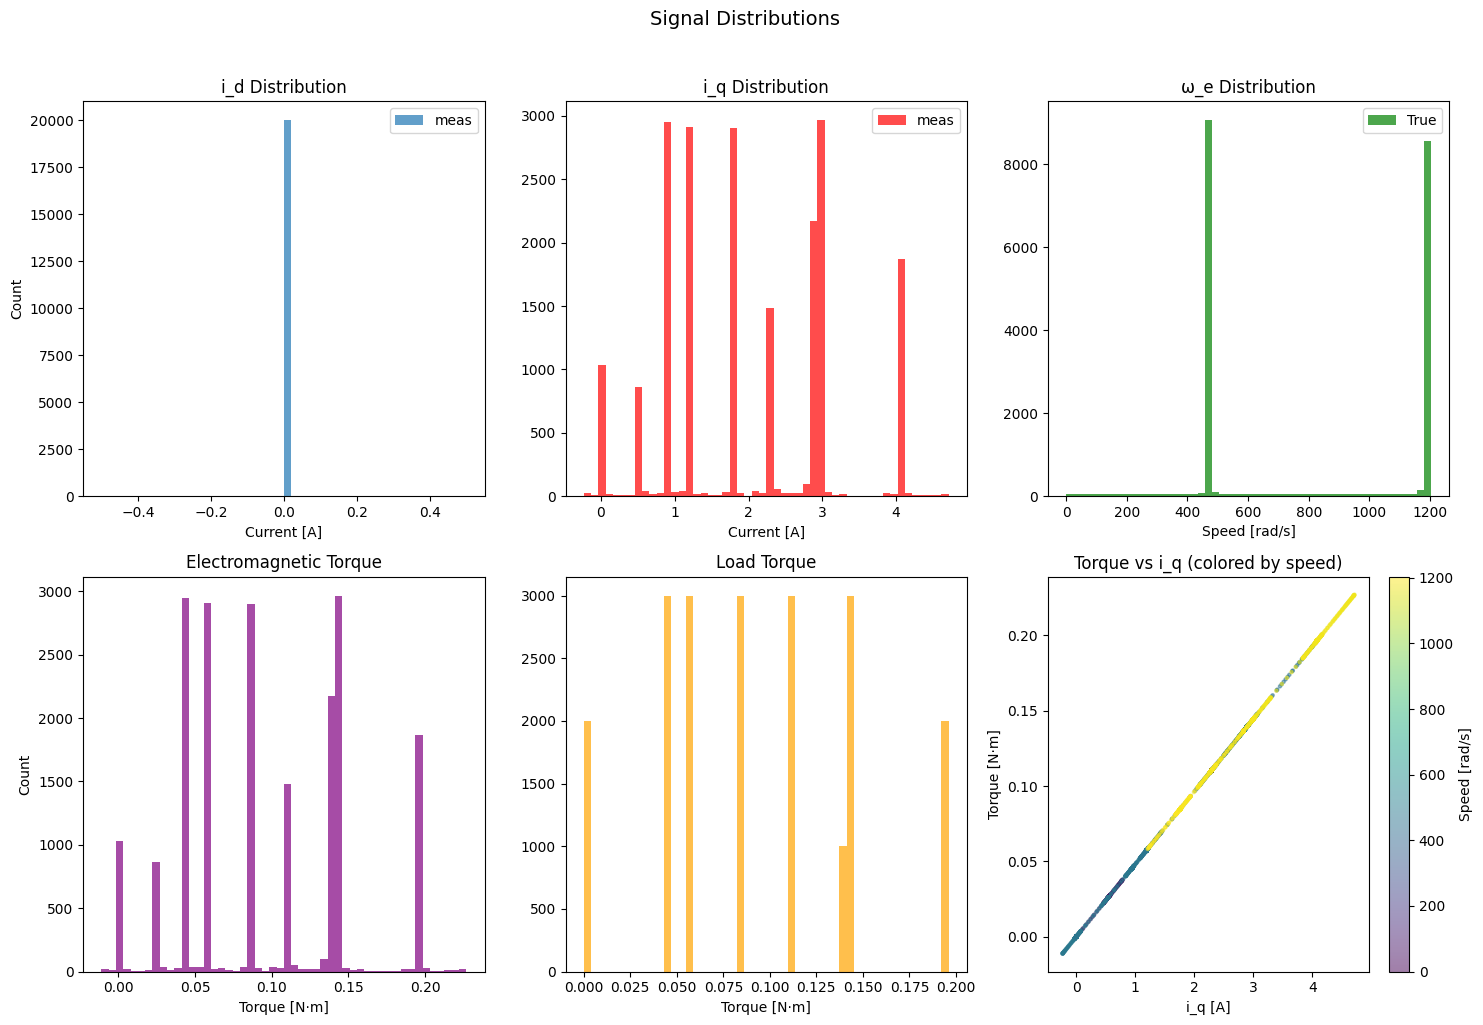

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# i_d distribution
ax[0, 0].hist(df['i_d'], bins=50, alpha=0.7, label='meas')
ax[0, 0].set_xlabel('Current [A]')
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_title('i_d Distribution')
ax[0, 0].legend()

# i_q distribution
ax[0, 1].hist(df['i_q'], bins=50, alpha=0.7, label='meas', color='red')
ax[0, 1].set_xlabel('Current [A]')
ax[0, 1].set_title('i_q Distribution')
ax[0, 1].legend()

# Speed distribution
ax[0, 2].hist(df['omega_e'], bins=50, alpha=0.7, label='True', color='green')
ax[0, 2].set_xlabel('Speed [rad/s]')
ax[0, 2].set_title('ω_e Distribution')
ax[0, 2].legend()

# Torque distribution
ax[1, 0].hist(df['torque_e'], bins=50, alpha=0.7, color='purple')
ax[1, 0].set_xlabel('Torque [N·m]')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Electromagnetic Torque')

# Load torque distribution
ax[1, 1].hist(df['torque_load'], bins=50, alpha=0.7, color='orange')
ax[1, 1].set_xlabel('Torque [N·m]')
ax[1, 1].set_title('Load Torque')

# Torque vs i_q scatter
scatter = ax[1, 2].scatter(df['i_q'], df['torque_e'], c=df['omega_e'], s=5, alpha=0.5, cmap='viridis')
ax[1, 2].set_xlabel('i_q [A]')
ax[1, 2].set_ylabel('Torque [N·m]')
ax[1, 2].set_title('Torque vs i_q (colored by speed)')
plt.colorbar(scatter, ax=ax[1, 2], label='Speed [rad/s]')

plt.suptitle('Signal Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Noise distribution

For testing the robustess of the angl observer there are multiple current measurements. The original data is the ideal simulation data. Then there are two current measurements with added quantization and noise. This way we can ensure that the algorithm works fine over different data qualities. The observer is working in alpha,beta frame, this is why here are the alpha beta currents and the distribution. The voltages are not observed, because normally there is no noise. Normal foc observer are taking currents from the adc and voltages diretly out of the algorithm, so no measurement noise, it is the reference of the controller.

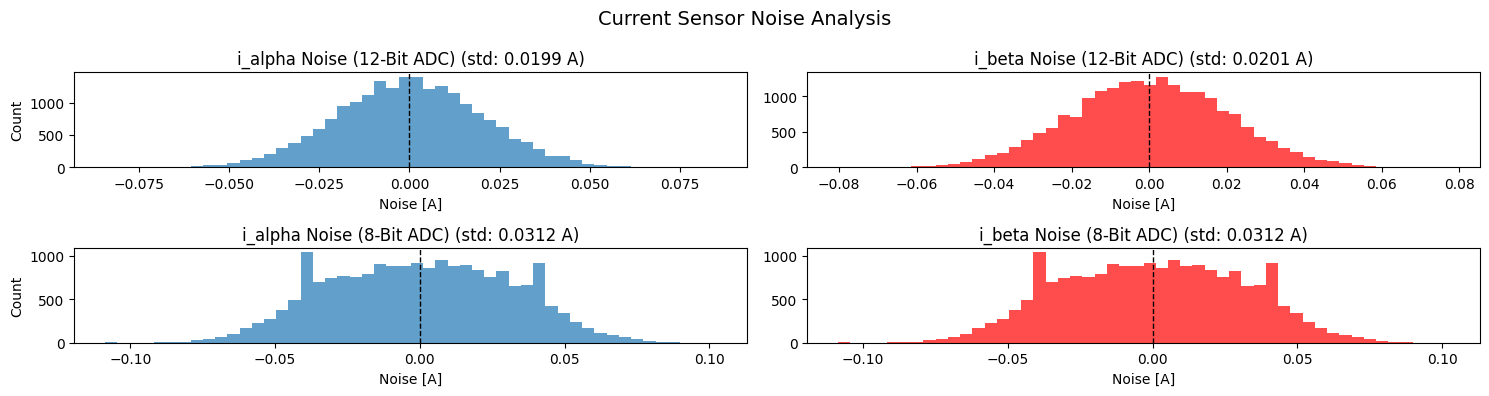

Noise Statistics:
i_alpha noise STD (12-Bit ADC): 0.019925 A
i_alpha noise STD (12-bit ADC): 0.020118 A
i_alpha noise STD (8-Bit ADC): 0.031197 A
i_alpha noise STD (8-bit ADC): 0.031065 A


In [8]:
# Noise analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 4))
ax = ax.flatten()

# Current noise 12-Bit
i_alpha_noise_12bit = df['i_alpha_meas_12'] - df['i_alpha']
i_beta_noise_12bit = df['i_beta_meas_12'] - df['i_beta']

ax[0].hist(i_alpha_noise_12bit, bins=50, alpha=0.7)
ax[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel('Noise [A]')
ax[0].set_ylabel('Count')
ax[0].set_title(f'i_alpha Noise (12-Bit ADC) (std: {i_alpha_noise_12bit.std():.4f} A)')

ax[1].hist(i_beta_noise_12bit, bins=50, alpha=0.7, color='red')
ax[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[1].set_xlabel('Noise [A]')
ax[1].set_title(f'i_beta Noise (12-Bit ADC) (std: {i_beta_noise_12bit.std():.4f} A)')

# Current noise 8-Bit
i_alpha_noise_8bit = df['i_alpha_meas_8'] - df['i_alpha']
i_beta_noise_8bit = df['i_beta_meas_8'] - df['i_beta']

ax[2].hist(i_alpha_noise_8bit, bins=50, alpha=0.7)
ax[2].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[2].set_xlabel('Noise [A]')
ax[2].set_ylabel('Count')
ax[2].set_title(f'i_alpha Noise (8-Bit ADC) (std: {i_alpha_noise_8bit.std():.4f} A)')

ax[3].hist(i_alpha_noise_8bit, bins=50, alpha=0.7, color='red')
ax[3].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[3].set_xlabel('Noise [A]')
ax[3].set_title(f'i_beta Noise (8-Bit ADC) (std: {i_alpha_noise_8bit.std():.4f} A)')



plt.suptitle('Current Sensor Noise Analysis', fontsize=14)
plt.tight_layout()
plt.show()

print("Noise Statistics:")
print(f"i_alpha noise STD (12-Bit ADC): {i_alpha_noise_12bit.std():.6f} A")
print(f"i_alpha noise STD (12-bit ADC): {i_beta_noise_12bit.std():.6f} A")
print(f"i_alpha noise STD (8-Bit ADC): {i_alpha_noise_8bit.std():.6f} A")
print(f"i_alpha noise STD (8-bit ADC): {i_beta_noise_8bit.std():.6f} A")


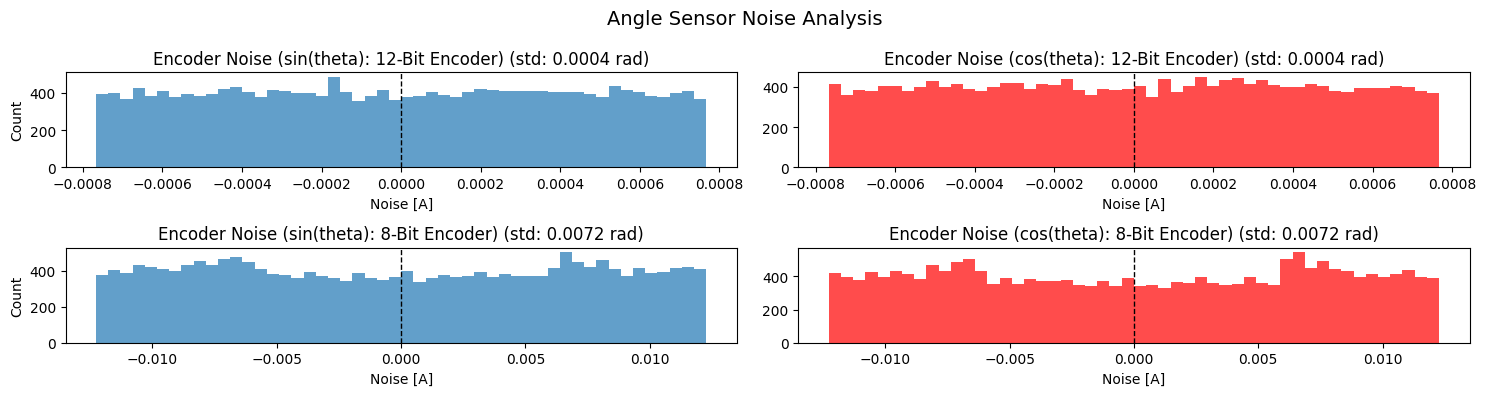

Noise Statistics:
Encoder Noise (sin(theta): 12-Bit Encoder):
  0.000442 rad,  0.025319°
Encoder Noise (cos(theta): 12-Bit Encoder):
  0.000440 rad,  0.025195°
Encoder Noise (sin(theta): 8-Bit Encoder):
  0.007200 rad,  0.412517°
Encoder Noise (cos(theta): 8-Bit Encoder):
  0.007231 rad,  0.414313°


In [9]:
# Noise analysis
fig, ax = plt.subplots(2, 2, figsize=(15, 4))
ax = ax.flatten()

# Current noise 12-Bit
sin_theta_noise_12_bit = df['sin_theta_e_12bit'] - df['sin_theta_e']
cos_theta_noise_12_bit = df['cos_theta_e_12bit'] - df['cos_theta_e']

ax[0].hist(sin_theta_noise_12_bit, bins=50, alpha=0.7)
ax[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel('Noise [A]')
ax[0].set_ylabel('Count')
ax[0].set_title(f'Encoder Noise (sin(theta): 12-Bit Encoder) (std: {sin_theta_noise_12_bit.std():.4f} rad)')

ax[1].hist(cos_theta_noise_12_bit, bins=50, alpha=0.7, color='red')
ax[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[1].set_xlabel('Noise [A]')
ax[1].set_title(f'Encoder Noise (cos(theta): 12-Bit Encoder) (std: {cos_theta_noise_12_bit.std():.4f} rad)')

# Current noise 8-Bit
sin_theta_noise_8_bit = df['sin_theta_e_8bit'] - df['sin_theta_e']
cos_theta_noise_8_bit = df['cos_theta_e_8bit'] - df['cos_theta_e']

ax[2].hist(sin_theta_noise_8_bit, bins=50, alpha=0.7)
ax[2].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[2].set_xlabel('Noise [A]')
ax[2].set_ylabel('Count')
ax[2].set_title(f'Encoder Noise (sin(theta): 8-Bit Encoder) (std: {sin_theta_noise_8_bit.std():.4f} rad)')

ax[3].hist(cos_theta_noise_8_bit, bins=50, alpha=0.7, color='red')
ax[3].axvline(x=0, color='black', linestyle='--', linewidth=1)
ax[3].set_xlabel('Noise [A]')
ax[3].set_title(f'Encoder Noise (cos(theta): 8-Bit Encoder) (std: {cos_theta_noise_8_bit.std():.4f} rad)')



plt.suptitle('Angle Sensor Noise Analysis', fontsize=14)
plt.tight_layout()
plt.show()

print("Noise Statistics:")
print("Encoder Noise (sin(theta): 12-Bit Encoder):")
print(f"  {sin_theta_noise_12_bit.std():.6f} rad,  {math.degrees(sin_theta_noise_12_bit.std()):.6f}°")
print("Encoder Noise (cos(theta): 12-Bit Encoder):")
print(f"  {cos_theta_noise_12_bit.std():.6f} rad,  {math.degrees(cos_theta_noise_12_bit.std()):.6f}°")
print("Encoder Noise (sin(theta): 8-Bit Encoder):")
print(f"  {sin_theta_noise_8_bit.std():.6f} rad,  {math.degrees(sin_theta_noise_8_bit.std()):.6f}°")
print("Encoder Noise (cos(theta): 8-Bit Encoder):")
print(f"  {cos_theta_noise_8_bit.std():.6f} rad,  {math.degrees(cos_theta_noise_8_bit.std()):.6f}°")

# Correlation analysis
Here is a small analysis if the project is even possible. From motor physics i know that its possible to recreate angle from alpha beta currents and voltages. Here is now a correlation analysis so we know that it is also possible from the simulated data.

PMSM Electrical Variables Correlation


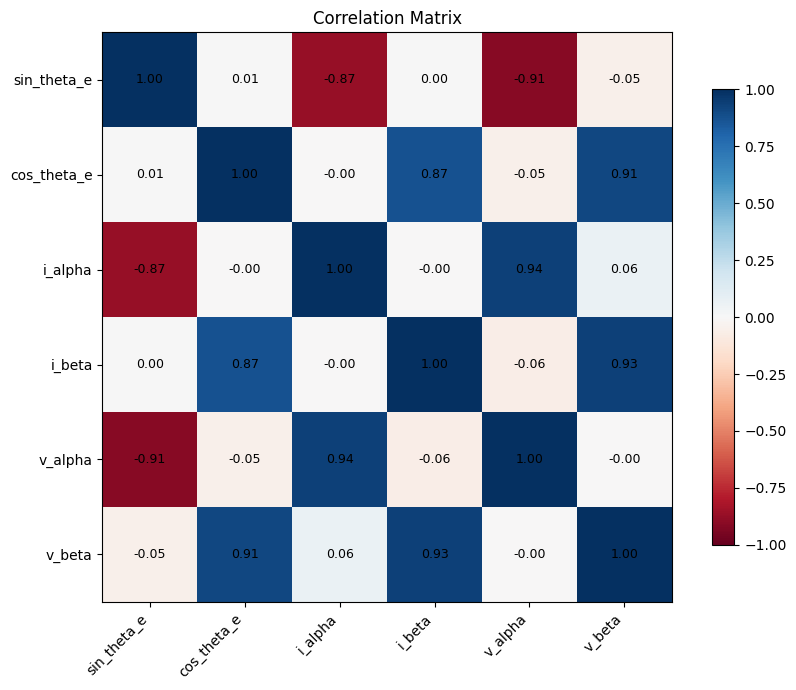


 Quick Interpretation:

Negative = opposite movement
Positive = same direction movement


In [10]:
# Cell: Minimal correlation matrix
print("PMSM Electrical Variables Correlation")

corr_cols = ['sin_theta_e', 'cos_theta_e', 'i_alpha', 'i_beta', 'v_alpha', 'v_beta']
corr = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(9, 7))

# Simple heatmap
im = ax.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)

# Add values
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        ax.text(j, i, f'{corr.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=9)

# Labels
ax.set_xticks(range(len(corr_cols)))
ax.set_yticks(range(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='right')
ax.set_yticklabels(corr_cols)

plt.colorbar(im, ax=ax, shrink=0.8)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\n Quick Interpretation:")
print("\nNegative = opposite movement")
print("Positive = same direction movement")

## Summary of EDA

In [11]:

print("\n Dataset Info:")
print(f"Total samples: {len(df):,}")
print(f"Time duration: {df['time'].max():.2f} seconds")
print(f"Sampling rate: {1/(df['time'].iloc[1] - df['time'].iloc[0]):.0f} Hz")

print("\n Target Variables (sin_theta, cos_theta):")
print(f"  Range: [{df['sin_theta_e'].min():.4f}, {df['sin_theta_e'].max():.4f}]")
print(f"  Mean: {df['sin_theta_e'].mean():.4f}")
print(f"  Std: {df['sin_theta_e'].std():.4f}")

print("\n Feature Ranges:")
print(f"  i_alpha: [{df['i_alpha'].min():6.2f}, {df['i_alpha'].max():6.2f}] A")
print(f"  i_beta: [{df['i_beta'].min():6.2}, {df['i_beta'].max():6.2f}] A")
print(f"  v_alpha: [{df['v_alpha'].min():6.2f}, {df['v_alpha'].max():6.2f}] V")
print(f"  v_beta: [{df['v_beta'].min():6.2}, {df['v_beta'].max():6.2f}] V")


 Dataset Info:
Total samples: 20,000
Time duration: 1.00 seconds
Sampling rate: 20000 Hz

 Target Variables (sin_theta, cos_theta):
  Range: [-1.0000, 1.0000]
  Mean: 0.0094
  Std: 0.7046

 Feature Ranges:
  i_alpha: [ -4.43,   4.09] A
  i_beta: [  -4.7,   4.09] A
  v_alpha: [-14.00,  14.00] V
  v_beta: [-1.4e+01,  14.27] V
